In [1]:
from utils import read_data
from sklearn.cluster import KMeans,MeanShift
from sklearn.mixture import GaussianMixture

data,name_of_columns = read_data('data/new_bean.csv')

clustering_algorithm = KMeans(n_clusters=4)
# clustering_algorithm = GaussianMixture(n_components=2, random_state=0)
# clustering_algorithm = MeanShift(bandwidth=2)

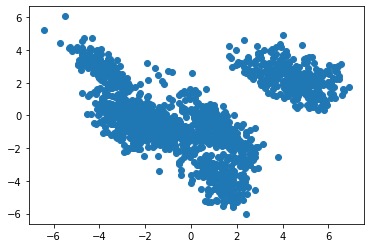

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
p_c=pca.fit_transform(data)

plt.scatter(p_c[:,0], p_c[:,1] )
plt.show()

0  number:  628
1  number:  320
2  number:  478
3  number:  201


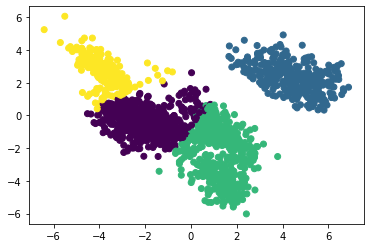

In [3]:
from sklearn.cluster import KMeans
import copy

cl_ag = copy.deepcopy(clustering_algorithm)
cl = cl_ag.fit(data)
lbl =  cl_ag.predict(data)

for x in set(list(lbl)):
    print(x,' number: ',list(lbl).count(x))
plt.scatter(p_c[:,0], p_c[:,1],c=lbl )
plt.show()

In [4]:
from explain_methods import method_1
from utils import print_feature_importance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# clf = LogisticRegression(random_state=0,penalty='none')
# clf = RandomForestClassifier(max_depth=4, random_state=0)
clf = KNeighborsClassifier(n_neighbors=20)

m_1_f_i = method_1(data,name_of_columns,cl,lbl,clf,n_repeats=100)
print_feature_importance(m_1_f_i)

feature name       importance
---------------  ------------
Eccentricity           0.1702
roundness              0.1538
ShapeFactor3           0.1468
Compactness            0.1364
AspectRation           0.1085
ShapeFactor2           0.0828
ShapeFactor4           0.0827
Solidity               0.048
MajorAxisLength        0.0202
ShapeFactor1           0.0188
Extent                 0.0163
Perimeter              0.0098
EquivDiameter          0.0048
MinorAxisLength        0.0008
Area                   0.0003
ConvexArea            -0.0001


In [5]:
from explain_methods import method_2

m_2_f_i = method_2(data,name_of_columns,cl,lbl,n_repeats=100)
print_feature_importance(m_2_f_i)

feature name       importance
---------------  ------------
Compactness            0.0784
MinorAxisLength        0.0767
ConvexArea             0.0758
Perimeter              0.0722
EquivDiameter          0.0678
Solidity               0.0637
ShapeFactor4           0.0633
Area                   0.0631
Eccentricity           0.06
ShapeFactor1           0.0588
MajorAxisLength        0.0578
roundness              0.0573
AspectRation           0.0566
Extent                 0.0524
ShapeFactor2           0.0501
ShapeFactor3           0.046


In [6]:
from explain_methods import method_3
from sklearn.cluster import KMeans

m_3_f_i = method_3(data,name_of_columns,clustering_algorithm,lbl,n_repeats=100)
print_feature_importance(m_3_f_i)

feature name       importance
---------------  ------------
AspectRation           0.2376
Area                   0.0821
ShapeFactor4           0.0726
Solidity               0.06
ShapeFactor2           0.0527
Extent                 0.0522
Eccentricity           0.0521
EquivDiameter          0.0513
MinorAxisLength        0.049
roundness              0.0489
Compactness            0.0479
ConvexArea             0.0461
ShapeFactor1           0.0407
ShapeFactor3           0.0384
Perimeter              0.0354
MajorAxisLength        0.0332


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:11<00:00,  1.40it/s]


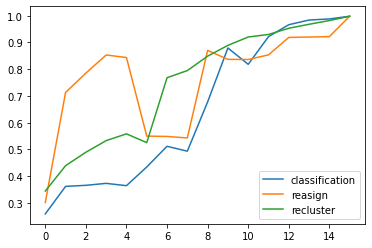

In [7]:
from utils import comparison_different_methods

list_of_FIs = [m_1_f_i,m_2_f_i,m_3_f_i]
list_of_labels = ['classification','reasign','recluster']
comparison_different_methods(data,list_of_FIs,list_of_labels,name_of_columns,clustering_algorithm)